# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [124]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
import time
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data  

In [126]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [127]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))

##Resizing the images ########################################################################################
# print(np.shape(data_test))
# data_train=resize_images(data_train,[5,5])
# data_test=resize_images(data_test,[5,5])
# print(np.shape(data_test))

# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

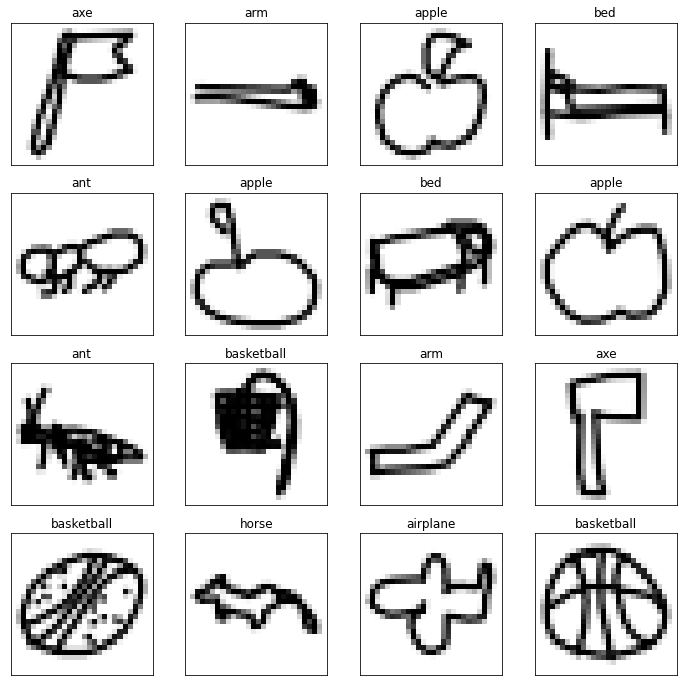

In [128]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [129]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [130]:
start_time = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
csv_logger = CSVLogger('5_28_256_100_50_25_25.csv', append=True, separator=';')
mod=model.fit(data_train, label_train, epochs=500, batch_size=32,callbacks=[csv_logger])
print("--- %s seconds ---" % (time.time() - start_time))
t=((time.time() - start_time))/60
print(t)

Epoch 1/500
100000/100000 [==============================] - 11s 110us/step - loss: 2.7210 - acc: 0.3543
Epoch 2/500
100000/100000 [==============================] - 11s 107us/step - loss: 1.3149 - acc: 0.5372
Epoch 3/500
100000/100000 [==============================] - 10s 99us/step - loss: 1.1306 - acc: 0.6425
Epoch 4/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.9740 - acc: 0.7369
Epoch 5/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.9983 - acc: 0.7306
Epoch 6/500
100000/100000 [==============================] - 10s 100us/step - loss: 0.9156 - acc: 0.7693
Epoch 7/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.9022 - acc: 0.7763
Epoch 8/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.9517 - acc: 0.7666
Epoch 9/500
100000/100000 [==============================] - 10s 98us/step - loss: 0.9729 - acc: 0.7797
Epoch 10/500
100000/100000 [==============================] -

100000/100000 [==============================] - 12s 122us/step - loss: 2.4276 - acc: 0.2499
Epoch 79/500
100000/100000 [==============================] - 12s 123us/step - loss: 2.4275 - acc: 0.2498
Epoch 80/500
100000/100000 [==============================] - 12s 122us/step - loss: 2.4276 - acc: 0.2493
Epoch 81/500
100000/100000 [==============================] - 12s 120us/step - loss: 2.4276 - acc: 0.2499
Epoch 82/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.4276 - acc: 0.2480
Epoch 83/500
100000/100000 [==============================] - 10s 105us/step - loss: 2.4276 - acc: 0.2490
Epoch 84/500
100000/100000 [==============================] - 11s 105us/step - loss: 2.4276 - acc: 0.2495
Epoch 85/500
100000/100000 [==============================] - 10s 96us/step - loss: 2.4276 - acc: 0.2494
Epoch 86/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.4276 - acc: 0.2497
Epoch 87/500
100000/100000 [==============================] 

100000/100000 [==============================] - 11s 110us/step - loss: 2.4276 - acc: 0.2505
Epoch 155/500
100000/100000 [==============================] - 10s 101us/step - loss: 2.4276 - acc: 0.2486
Epoch 156/500
100000/100000 [==============================] - 11s 114us/step - loss: 2.4276 - acc: 0.2495
Epoch 157/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.4276 - acc: 0.2508
Epoch 158/500
100000/100000 [==============================] - 11s 109us/step - loss: 2.4276 - acc: 0.2493
Epoch 159/500
100000/100000 [==============================] - 12s 122us/step - loss: 2.4276 - acc: 0.2502
Epoch 160/500
100000/100000 [==============================] - 14s 140us/step - loss: 2.4276 - acc: 0.2494
Epoch 161/500
100000/100000 [==============================] - 14s 137us/step - loss: 2.4276 - acc: 0.2495
Epoch 162/500
100000/100000 [==============================] - 19s 188us/step - loss: 2.4276 - acc: 0.2503
Epoch 163/500
100000/100000 [======================

100000/100000 [==============================] - 15s 146us/step - loss: 2.4276 - acc: 0.2504
Epoch 231/500
100000/100000 [==============================] - 11s 113us/step - loss: 2.4276 - acc: 0.2501
Epoch 232/500
100000/100000 [==============================] - 13s 130us/step - loss: 2.4276 - acc: 0.2502
Epoch 233/500
100000/100000 [==============================] - 15s 152us/step - loss: 2.4276 - acc: 0.2504
Epoch 234/500
100000/100000 [==============================] - 13s 130us/step - loss: 2.4276 - acc: 0.2496
Epoch 235/500
100000/100000 [==============================] - 13s 132us/step - loss: 2.4276 - acc: 0.2515
Epoch 236/500
100000/100000 [==============================] - 14s 135us/step - loss: 2.4276 - acc: 0.2498
Epoch 237/500
100000/100000 [==============================] - 11s 110us/step - loss: 2.4276 - acc: 0.2493
Epoch 238/500
100000/100000 [==============================] - 12s 123us/step - loss: 2.4276 - acc: 0.2499
Epoch 239/500
100000/100000 [======================

100000/100000 [==============================] - 9s 90us/step - loss: 2.4276 - acc: 0.2494
Epoch 308/500
100000/100000 [==============================] - 9s 87us/step - loss: 2.4276 - acc: 0.2485
Epoch 309/500
100000/100000 [==============================] - 8s 78us/step - loss: 2.4276 - acc: 0.2490
Epoch 310/500
100000/100000 [==============================] - 8s 77us/step - loss: 2.4276 - acc: 0.2492
Epoch 311/500
100000/100000 [==============================] - 8s 77us/step - loss: 2.4275 - acc: 0.2512
Epoch 312/500
100000/100000 [==============================] - 8s 76us/step - loss: 2.4276 - acc: 0.2500
Epoch 313/500
100000/100000 [==============================] - 7s 74us/step - loss: 2.4276 - acc: 0.2491
Epoch 314/500
100000/100000 [==============================] - 7s 70us/step - loss: 2.4276 - acc: 0.2499
Epoch 315/500
100000/100000 [==============================] - 7s 73us/step - loss: 2.4276 - acc: 0.2494
Epoch 316/500
100000/100000 [==============================] - 7s 69u

100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2492
Epoch 386/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2494
Epoch 387/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2503
Epoch 388/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2502
Epoch 389/500
100000/100000 [==============================] - 7s 68us/step - loss: 2.4276 - acc: 0.2488
Epoch 390/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2498
Epoch 391/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2501
Epoch 392/500
100000/100000 [==============================] - 7s 70us/step - loss: 2.4276 - acc: 0.2507
Epoch 393/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2502
Epoch 394/500
100000/100000 [==============================] - 7s 69u

100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2497
Epoch 464/500
100000/100000 [==============================] - 7s 68us/step - loss: 2.4276 - acc: 0.2503
Epoch 465/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2491
Epoch 466/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4275 - acc: 0.2495
Epoch 467/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2500
Epoch 468/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2500
Epoch 469/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2500
Epoch 470/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2502
Epoch 471/500
100000/100000 [==============================] - 7s 69us/step - loss: 2.4276 - acc: 0.2500
Epoch 472/500
100000/100000 [==============================] - 7s 69u

In [131]:
model.save('pa2-part2-model5_28_256_100_50_25_25_80.81.h5')